In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client(n_workers=8)
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 90.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45475,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 90.00 GiB
Comm: tcp://127.0.0.1:46131,Total threads: 1
Dashboard: /proxy/37745/status,Memory: 11.25 GiB
Nanny: tcp://127.0.0.1:45723,


In [3]:
### Generate new session

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
session = cc.database.create_session(db)

In [4]:
cont_1900_2100 = xr.open_mfdataset(
    paths='/scratch/e14/rmh561/access-om2/archive/1deg_jra55v14_ryf_rcpcont/output0*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')

cont_2100_2500 = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')[5:-5]

cont = xr.concat([cont_1900_2100, cont_2100_2500], dim='year').load()

In [5]:
cool = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cool_x1/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time').load()
warm = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_warm_x1/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time').load()

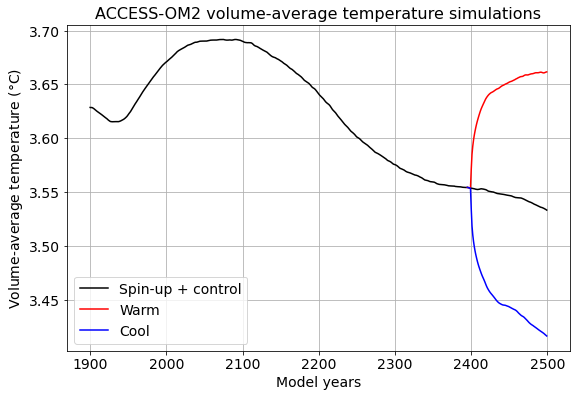

In [12]:
plt.figure(figsize = (9,6))

cont.plot(color='k',label='Spin-up + control')
warm.plot(color='r',label='Warm')
cool.plot(color='b',label='Cool')

fontsize=14
plt.title('ACCESS-OM2 volume-average temperature simulations', fontsize=fontsize+2)
plt.ylabel('Volume-average temperature ($\degree$C)', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Model years', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.savefig('Fig2.pdf', bbox_inches='tight', dpi=300)

In [18]:
cont_kb4 = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont_kb4/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time').sel(year=slice(None,2120))

cool_kb4 = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cool_x1_kb4/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')

warm_kb4 = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_warm_x1_kb4/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')

In [17]:
cont_nokb = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont_nokb/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time').sel(year=slice(None,2120))

cool_nokb = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cool_x1_nokb/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')

warm_nokb = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_warm_x1_nokb/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')

In [21]:
cool_kbv = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cool_x1_kbv/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')

warm_kbv = xr.open_mfdataset(
    paths='/scratch/e14/mp2135/access-om2/archive/1deg_jra55_ryf_warm_x1_kbv/output*/ocean/ocean-scalar-1-daily-ym*', 
    combine='by_coords').temp_global_ave[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time')

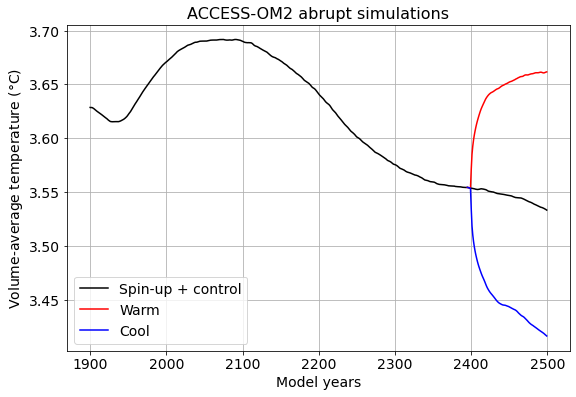

In [31]:
plt.figure(figsize = (9,6))

cont.plot(color='k',label='Spin-up + control')

warm.plot(color='r',label='Warm')

cool.plot(color='b',label='Cool')

fontsize=14
plt.title('ACCESS-OM2 abrupt simulations', fontsize=fontsize+2)
plt.ylabel('Volume-average temperature ($\degree$C)', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Model years', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.savefig('Fig2.pdf', bbox_inches='tight', dpi=300)

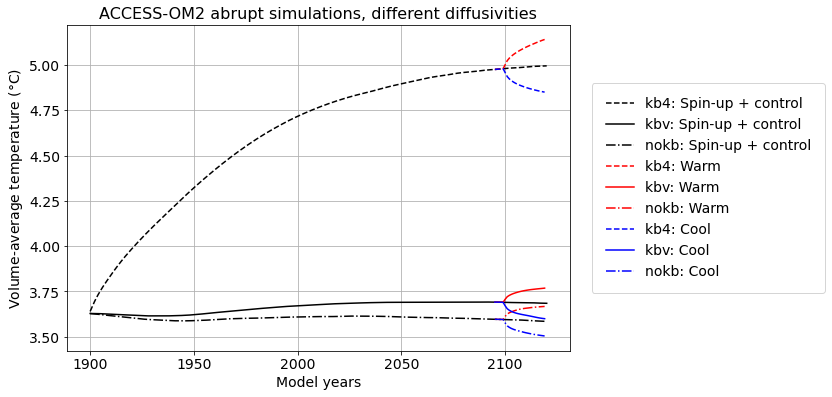

In [34]:
plt.figure(figsize = (9,6))

cont_kb4.plot(color='k',label='kb4: Spin-up + control', linestyle='--')
(cont.sel(year=slice(None,2120))).plot(color='k',label='kbv: Spin-up + control')
cont_nokb.plot(color='k',label='nokb: Spin-up + control', linestyle='-.')

warm_kb4.plot(color='r',label='kb4: Warm', linestyle='--')
warm_kbv.plot(color='r',label='kbv: Warm')
warm_nokb.plot(color='r',label='nokb: Warm', linestyle='-.')

cool_kb4.plot(color='b',label='kb4: Cool', linestyle='--')
cool_kbv.plot(color='b',label='kbv: Cool')
cool_nokb.plot(color='b',label='nokb: Cool', linestyle='-.')

fontsize=14
plt.title('ACCESS-OM2 abrupt simulations, different diffusivities', fontsize=fontsize+2)
plt.ylabel('Volume-average temperature ($\degree$C)', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Model years', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(fancybox=True, borderpad=1,bbox_to_anchor=(1.03, 0.5),loc = 'center left', fontsize=fontsize)
plt.grid()
plt.savefig('FigX.pdf', bbox_inches='tight', dpi=300)

<xarray.DataArray 'temp_global_ave' ()>
array(-0.00328695)

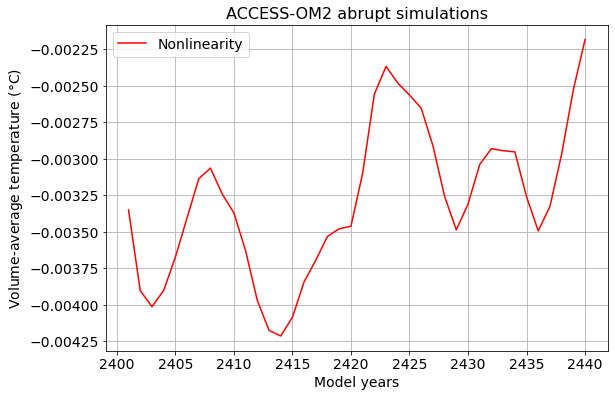

In [45]:
plt.figure(figsize = (9,6))

(warm+cool-2*cont).sel(year=slice(2401,2440)).plot(color='r',label='Nonlinearity')

fontsize=14
plt.title('ACCESS-OM2 abrupt simulations', fontsize=fontsize+2)
plt.ylabel('Volume-average temperature ($\degree$C)', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Model years', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()

np.mean((warm+cool-2*cont).sel(year=slice(2401,2440)))